## Importing Dependencies

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV


## Data collection and preprocessing

In [5]:
# loading data from csv file to pandas dataframe
calories = pd.read_csv(r"/Users/muktha/Downloads/calories.csv")
calories.drop('User_ID',axis = 1,inplace = True)


In [7]:
exercise = pd.read_csv(r"/Users/muktha/Downloads/exercise.csv")
exercise

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8
...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3


### combining the two dataframes 

In [9]:
workout = pd.concat([exercise,calories,],axis = 1)
workout

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,female,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,female,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,female,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,male,78,193.0,97.0,2.0,84.0,38.3,11.0


In [21]:
#checking the number of rows and columns
workout.shape

(15000, 9)

In [23]:
#getting info

workout.info

<bound method DataFrame.info of         User_ID  Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp  \
0      14733363    male   68   190.0    94.0      29.0       105.0       40.8   
1      14861698  female   20   166.0    60.0      14.0        94.0       40.3   
2      11179863    male   69   179.0    79.0       5.0        88.0       38.7   
3      16180408  female   34   179.0    71.0      13.0       100.0       40.5   
4      17771927  female   27   154.0    58.0      10.0        81.0       39.8   
...         ...     ...  ...     ...     ...       ...         ...        ...   
14995  15644082  female   20   193.0    86.0      11.0        92.0       40.4   
14996  17212577  female   27   165.0    65.0       6.0        85.0       39.2   
14997  17271188  female   43   159.0    58.0      16.0        90.0       40.1   
14998  18643037    male   78   193.0    97.0       2.0        84.0       38.3   
14999  11751526    male   63   173.0    79.0      18.0        92.0       40.5

In [25]:
#checking for missing value
workout.isna().sum()

User_ID       0
Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [11]:
workout['Gender'] = LabelEncoder().fit_transform(workout['Gender'])
workout

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,14861698,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,11179863,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,16180408,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,17771927,0,27,154.0,58.0,10.0,81.0,39.8,35.0
...,...,...,...,...,...,...,...,...,...
14995,15644082,0,20,193.0,86.0,11.0,92.0,40.4,45.0
14996,17212577,0,27,165.0,65.0,6.0,85.0,39.2,23.0
14997,17271188,0,43,159.0,58.0,16.0,90.0,40.1,75.0
14998,18643037,1,78,193.0,97.0,2.0,84.0,38.3,11.0


### outlier treatment

In [13]:
q1=workout["Height"].quantile(0.25)
q3=workout["Height"].quantile(0.75)
iqr=q3-q1

lower=q1 -(1.5* iqr)
upper=q3 +(1.5 * iqr)
workout["Height"] =workout["Height"].clip(lower,upper)

In [15]:
q1=workout["Weight"].quantile(0.25)
q3=workout["Weight"].quantile(0.75)
iqr=q3-q1

lower=q1 -(1.5* iqr)
upper=q3 +(1.5 * iqr)
workout["Weight"] =workout["Weight"].clip(lower,upper)

In [17]:
q1=workout["Heart_Rate"].quantile(0.25)
q3=workout["Heart_Rate"].quantile(0.75)
iqr=q3-q1

lower=q1 -(1.5* iqr)
upper=q3 +(1.5 * iqr)
workout["Heart_Rate"] =workout["Heart_Rate"].clip(lower,upper)

In [19]:
q1=workout["Calories"].quantile(0.25)
q3=workout["Calories"].quantile(0.75)
iqr=q3-q1

lower=q1 -(1.5* iqr)
upper=q3 +(1.5 * iqr)
workout["Calories"] =workout["Calories"].clip(lower,upper)

## Data Analysis

In [30]:
# get some statistical measures of data
workout.describe()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,1.500000e+04,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,1.497736e+07,0.496467,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,2.872851e+06,0.500004,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,1.000116e+07,0.000000,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,1.247419e+07,0.000000,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,1.499728e+07,0.000000,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,1.744928e+07,1.000000,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,1.999965e+07,1.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


## Data Visualization

In [33]:
sns.set()

In [35]:
import warnings
warnings.filterwarnings('ignore')

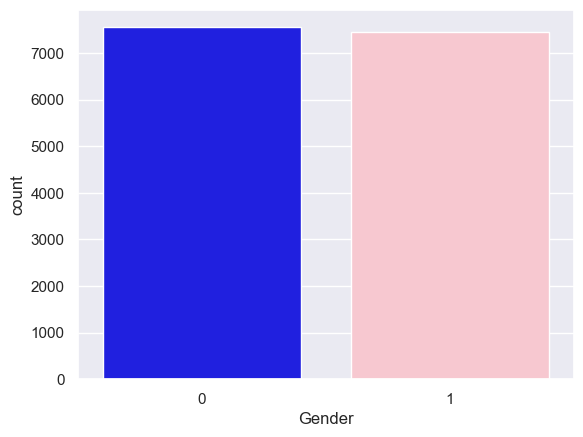

In [37]:
sns.countplot(data=workout, x='Gender', palette=['blue', 'pink'])
plt.show()


In [21]:
workout.drop('User_ID',axis = 1,inplace = True)

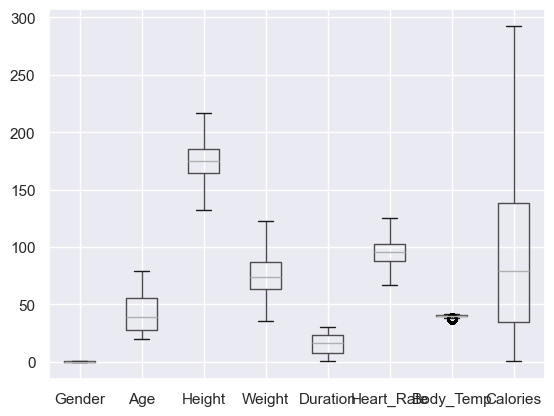

In [51]:
import matplotlib.pyplot as plt
workout.boxplot()
plt.show()

### Finding The Correlation of Dataset

In [166]:
corr = workout.corr()
corr

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


<Axes: >

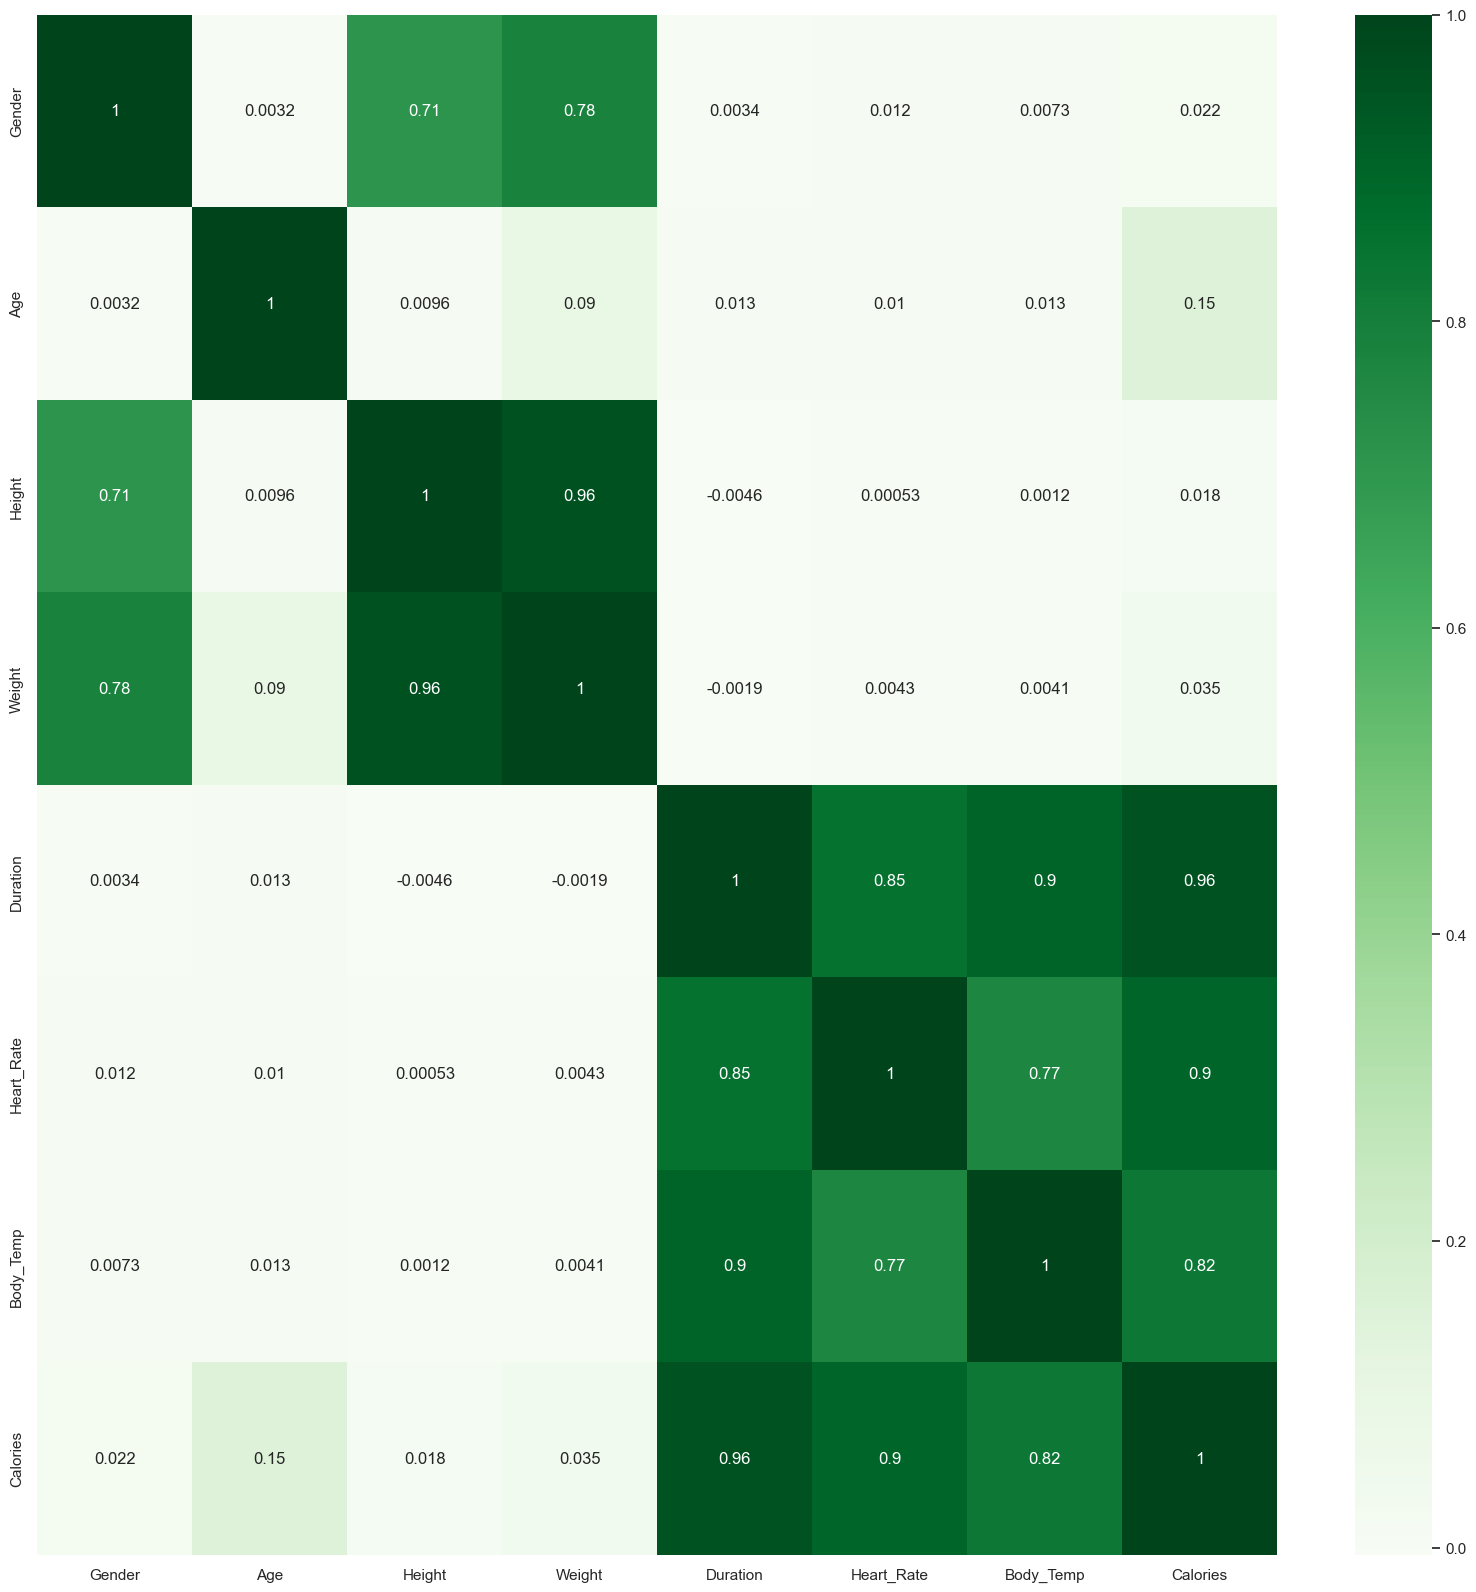

In [168]:
plt.figure(figsize = (20,20))
sns.heatmap(corr,annot = True,cmap = 'Greens')

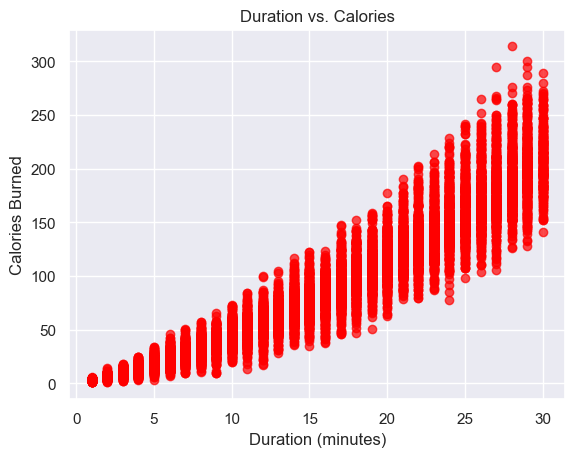

In [170]:


plt.scatter(workout['Duration'], workout['Calories'], alpha=0.7, color='red')
plt.title('Duration vs. Calories')
plt.xlabel('Duration (minutes)')
plt.ylabel('Calories Burned')
plt.show()


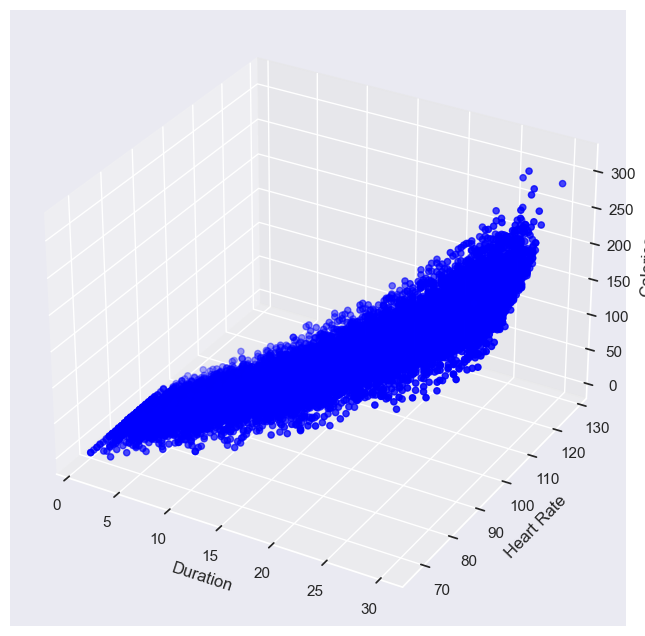

In [172]:

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(workout['Duration'], workout['Heart_Rate'], workout['Calories'], c='blue')
ax.set_xlabel('Duration')
ax.set_ylabel('Heart Rate')
ax.set_zlabel('Calories')
plt.show()


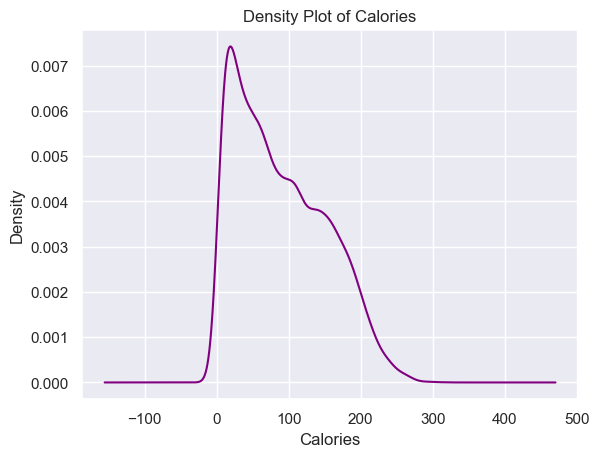

In [174]:
workout['Calories'].plot.kde(color='purple')
plt.title('Density Plot of Calories')
plt.xlabel('Calories')
plt.show()


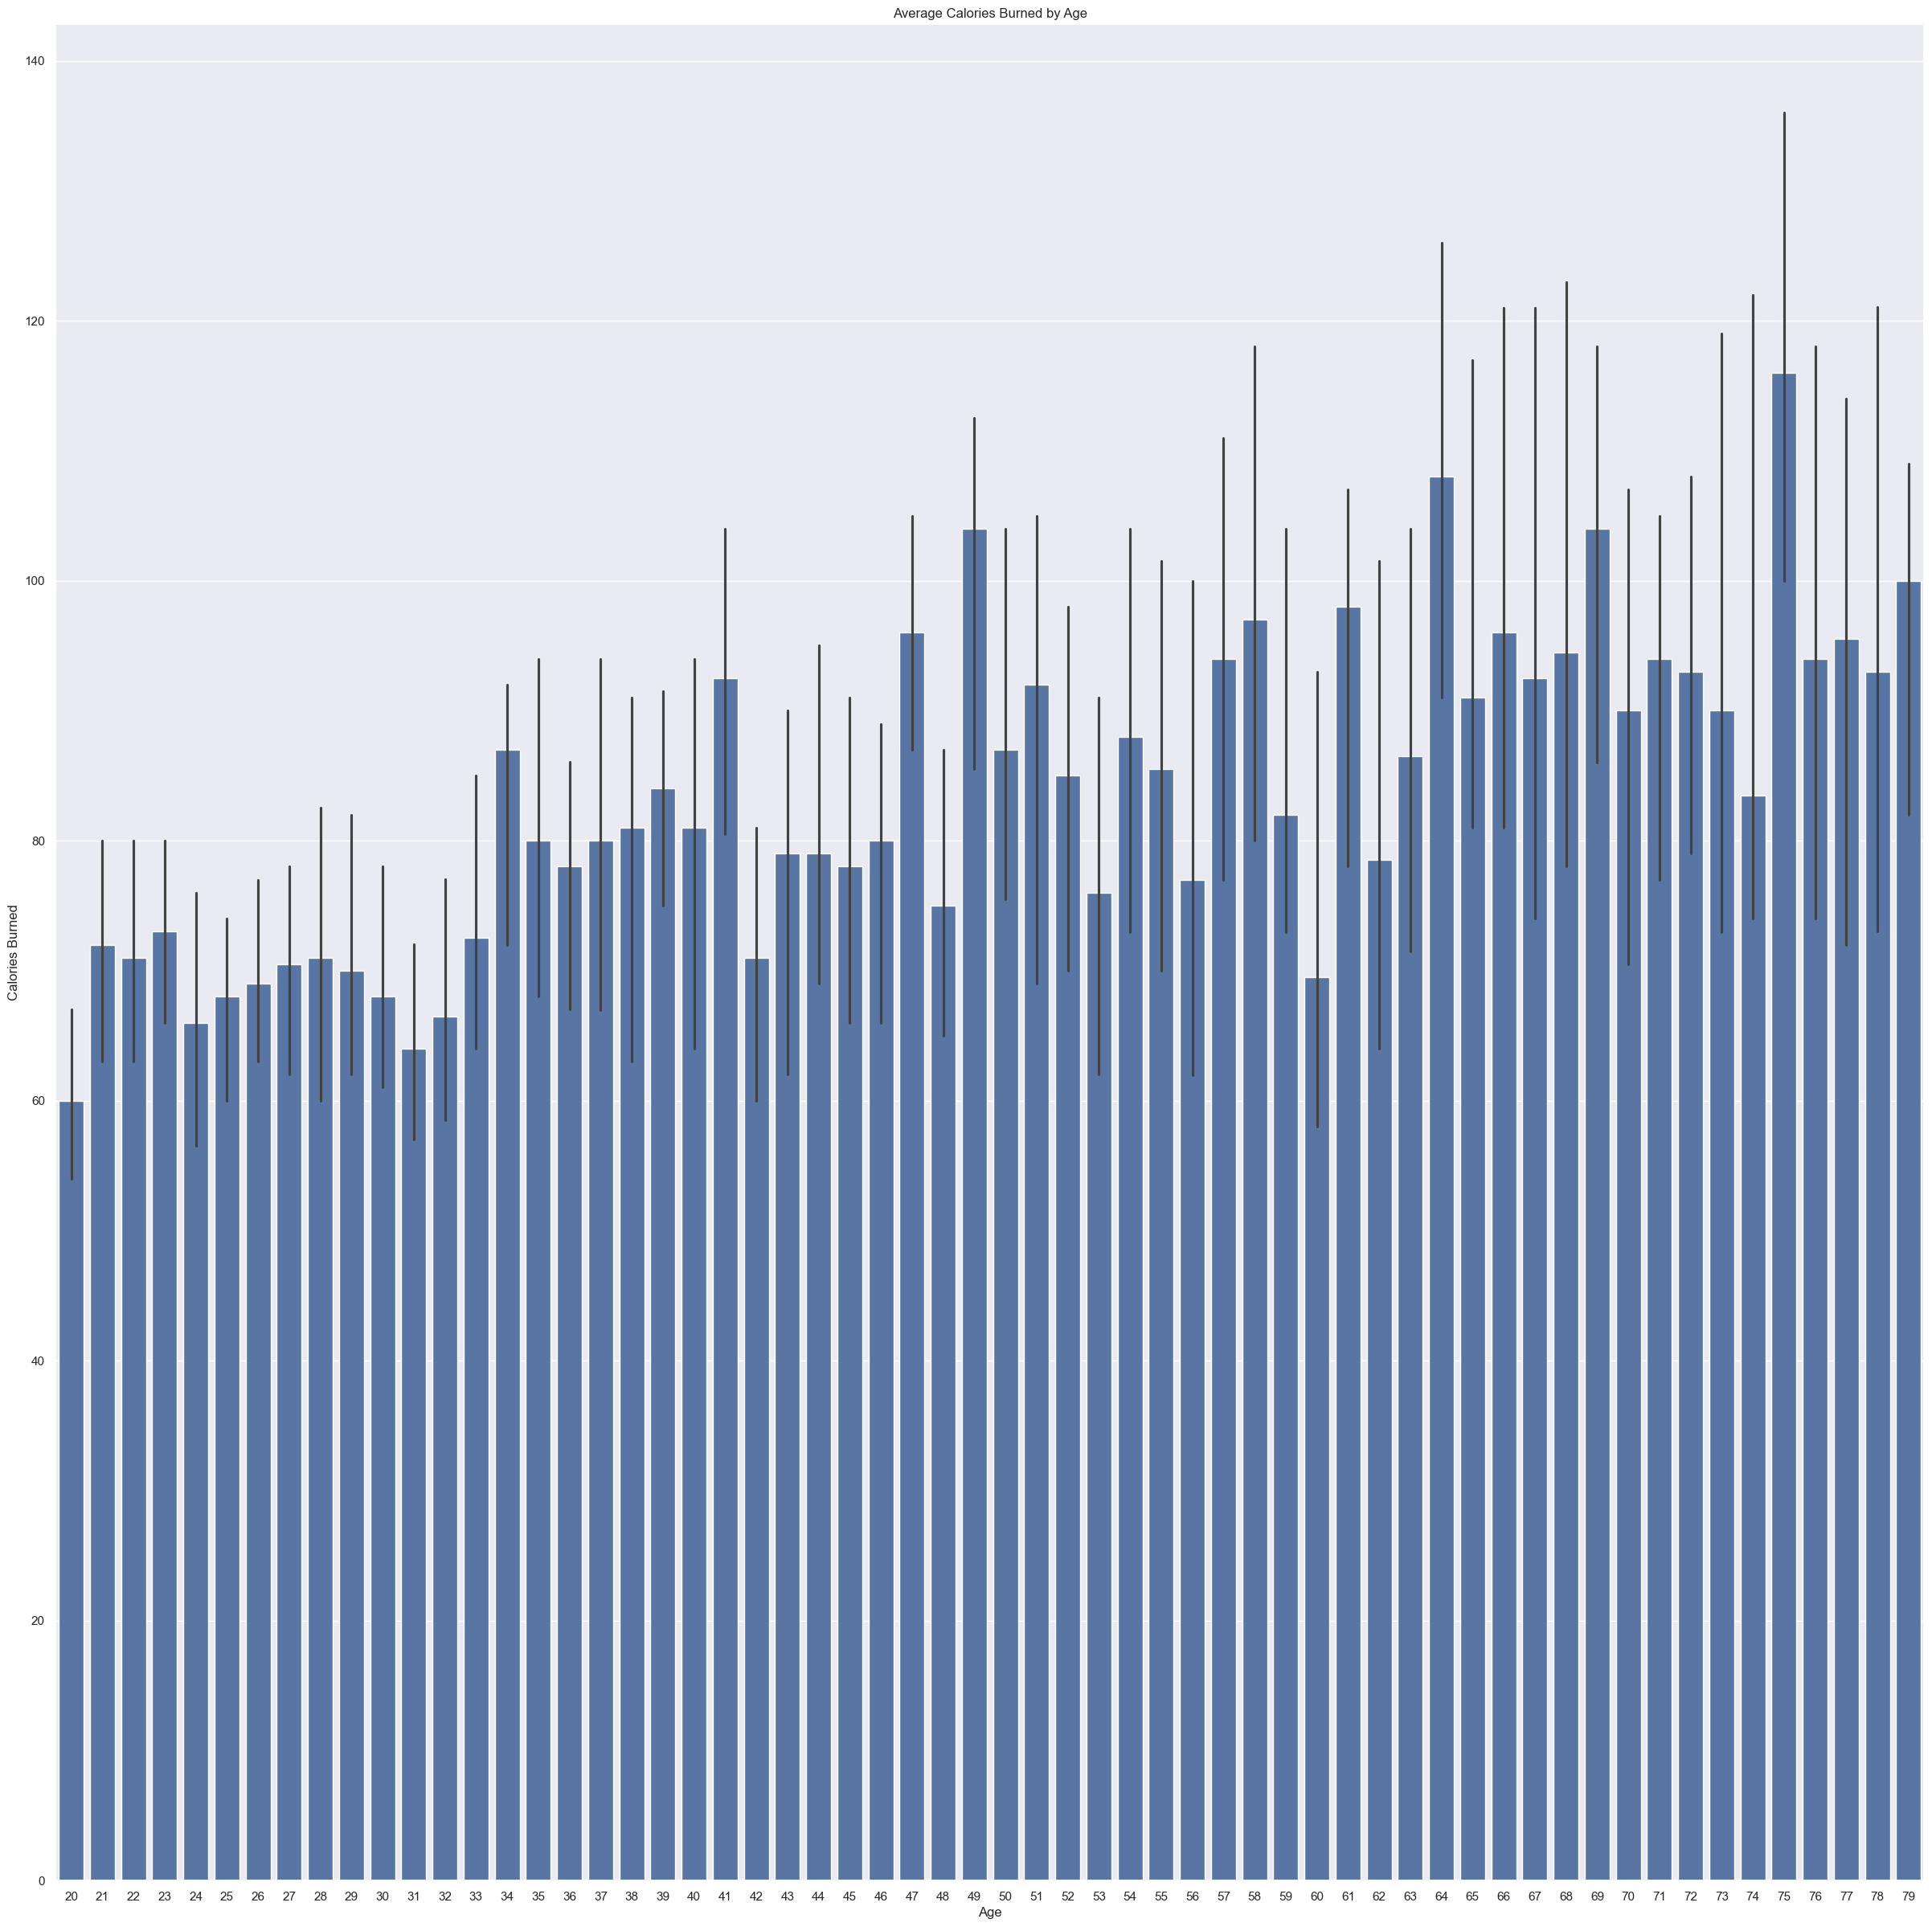

In [176]:
plt.figure(figsize = (30,30))
sns.barplot(x='Age', y='Calories', data=workout, estimator=np.median)
plt.title('Average Calories Burned by Age')
plt.xlabel('Age')
plt.ylabel('Calories Burned')
plt.show()


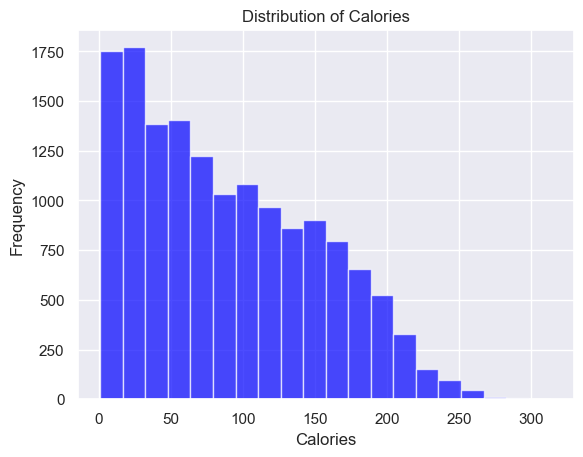

In [177]:
workout['Calories'].hist(bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Calories')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()


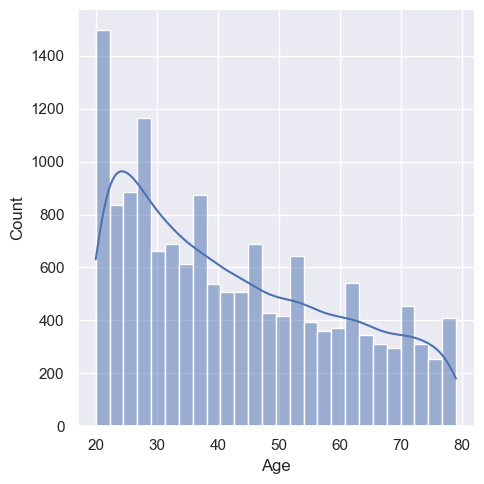

In [180]:
# finding distribution of age column
sns.displot(workout['Age'],kde = True)

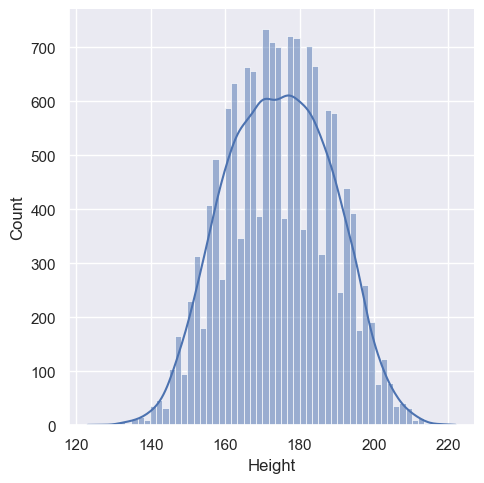

In [182]:
# finding distribution of height column
sns.displot(workout['Height'],kde = True)

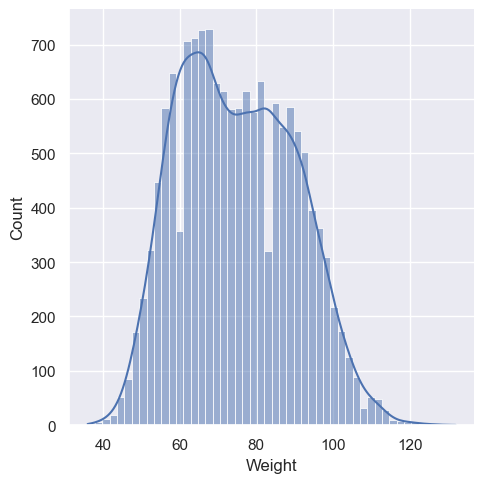

In [184]:
# finding distribution of weight column
sns.displot(workout['Weight'],kde = True)

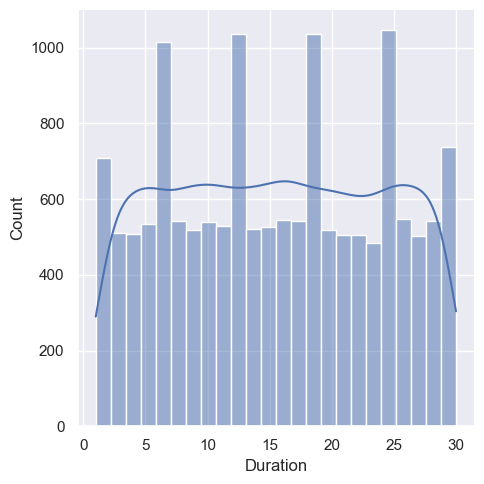

In [186]:
# finding distribution of duration column
sns.displot(workout['Duration'],kde = True)

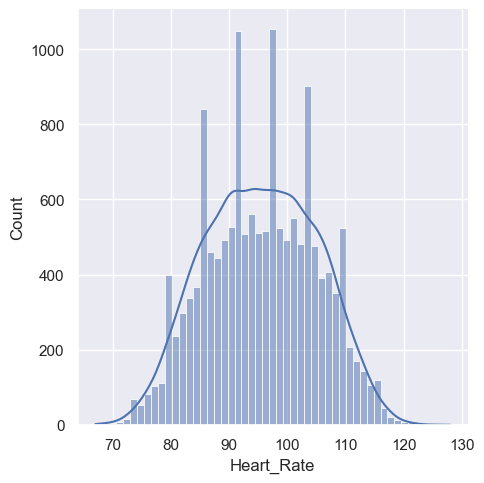

In [188]:
# finding distribution of heart rate column
sns.displot(workout['Heart_Rate'],kde = True)

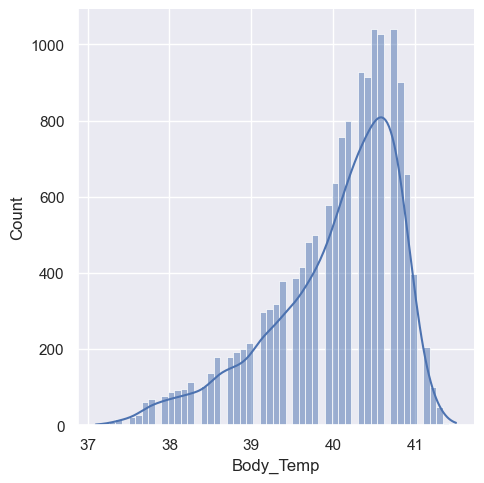

In [190]:
# finding distribution of body temp column
sns.displot(workout['Body_Temp'],kde = True)

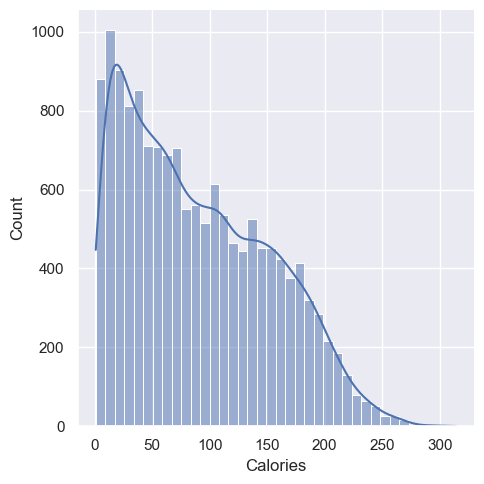

In [192]:
# finding distribution of calories column
sns.displot(workout['Calories'],kde = True)

## seperating features and target

In [23]:
y = workout['Calories']
x = workout.drop('Calories',axis = 1)

In [200]:
print(x)

       Gender  Age  Height  Weight  Duration  Heart_Rate  Body_Temp
0           1   68   190.0    94.0      29.0       105.0       40.8
1           0   20   166.0    60.0      14.0        94.0       40.3
2           1   69   179.0    79.0       5.0        88.0       38.7
3           0   34   179.0    71.0      13.0       100.0       40.5
4           0   27   154.0    58.0      10.0        81.0       39.8
...       ...  ...     ...     ...       ...         ...        ...
14995       0   20   193.0    86.0      11.0        92.0       40.4
14996       0   27   165.0    65.0       6.0        85.0       39.2
14997       0   43   159.0    58.0      16.0        90.0       40.1
14998       1   78   193.0    97.0       2.0        84.0       38.3
14999       1   63   173.0    79.0      18.0        92.0       40.5

[15000 rows x 7 columns]


In [202]:
print(y)

0        231.0
1         66.0
2         26.0
3         71.0
4         35.0
         ...  
14995     45.0
14996     23.0
14997     75.0
14998     11.0
14999     98.0
Name: Calories, Length: 15000, dtype: float64


### splitting data into training data and test data

In [25]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = .2,random_state = 42)

In [27]:
print(x.shape,x_train.shape,x_test.shape)

(15000, 7) (12000, 7) (3000, 7)


## selecting best model using cross validation

In [210]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

# Define the input and target variables
y = workout['Calories']
x = workout.drop('Calories', axis=1)

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store scores
linear_train_scores = []
linear_test_scores = []
rf_train_scores = []
rf_test_scores = []
xgb_train_scores = []
xgb_test_scores = []
svr_train_scores = []
svr_test_scores = []

# Define a function to calculate and return a chosen metric
def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # Return training and testing r2 score
    return r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)  

# Perform k-fold cross-validation
for train_index, test_index in kf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Get the scores for each model
    linear_train, linear_test = get_score(LinearRegression(), x_train, x_test, y_train, y_test)
    rf_train, rf_test = get_score(RandomForestRegressor(random_state=34), x_train, x_test, y_train, y_test)
    xgb_train, xgb_test = get_score(XGBRegressor(random_state=34), x_train, x_test, y_train, y_test)
    svr_train, svr_test = get_score(SVR(), x_train, x_test, y_train, y_test)

    # Append training and test scores for each model
    linear_train_scores.append(linear_train)
    linear_test_scores.append(linear_test)
    
    rf_train_scores.append(rf_train)
    rf_test_scores.append(rf_test)
    
    xgb_train_scores.append(xgb_train)
    xgb_test_scores.append(xgb_test)
    
    svr_train_scores.append(svr_train)
    svr_test_scores.append(svr_test)

# Print the results for training and test scores
print("Linear Regression - Training Scores:", linear_train_scores)
print("Linear Regression - Test Scores:", linear_test_scores)

print("Random Forest Regressor - Training Scores:", rf_train_scores)
print("Random Forest Regressor - Test Scores:", rf_test_scores)

print("XGBoost Regressor - Training Scores:", xgb_train_scores)
print("XGBoost Regressor - Test Scores:", xgb_test_scores)

print("SVR - Training Scores:", svr_train_scores)
print("SVR - Test Scores:", svr_test_scores)

# Calculate the average and standard deviation of training and test scores for each model
def print_model_stats(model_name, train_scores, test_scores):
    print(f"\n{model_name} - Average Training Score:", round(np.mean(train_scores), 4))
    print(f"{model_name} - Average Test Score:", round(np.mean(test_scores), 4))
    print(f"{model_name} - Training Score Standard Deviation:", round(np.std(train_scores), 4))
    print(f"{model_name} - Test Score Standard Deviation:", round(np.std(test_scores), 4))

# Print model performance statistics
print_model_stats("Linear Regression", linear_train_scores, linear_test_scores)
print_model_stats("Random Forest", rf_train_scores, rf_test_scores)
print_model_stats("XGBoost", xgb_train_scores, xgb_test_scores)
print_model_stats("SVR", svr_train_scores, svr_test_scores)


Linear Regression - Training Scores: [0.9671621074066676, 0.9676248967601424, 0.9671081903141099, 0.9669472533570472, 0.9671707997971063]
Linear Regression - Test Scores: [0.9672937151257295, 0.9654315615276937, 0.9674671021552204, 0.9681953453970189, 0.9673134176322573]
Random Forest Regressor - Training Scores: [0.9996925537041903, 0.9996858461680601, 0.9996847542467877, 0.9997142642950333, 0.9996917658424109]
Random Forest Regressor - Test Scores: [0.9982761518430588, 0.9977798524421236, 0.9980549931638795, 0.9977807159281269, 0.9976421686924212]
XGBoost Regressor - Training Scores: [0.9995777219604748, 0.9995823149736397, 0.9995655286406412, 0.9996046489996547, 0.9995907996365485]
XGBoost Regressor - Test Scores: [0.9988678909361673, 0.9989266431573667, 0.9988431417625669, 0.9987311697128933, 0.9988865867035962]
SVR - Training Scores: [0.9391947309401377, 0.93976055451853, 0.9397934661146157, 0.9385680810766888, 0.9400315575292625]
SVR - Test Scores: [0.9368054923186286, 0.93787060

In [31]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

y = workout['Calories']
x = workout.drop('Calories', axis=1)

# Initialize k-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store scores for Decision Tree and KNN
dt_train_scores = []
dt_test_scores = []
knn_train_scores = []
knn_test_scores = []

def get_score(model, x_train, x_test, y_train, y_test):
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    
    # Return training and testing r2 score
    return r2_score(y_train, y_pred_train), r2_score(y_test, y_pred_test)  

# Perform k-fold cross-validation
for train_index, test_index in kf.split(x, y):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Get the scores for Decision Tree
    dt_train, dt_test = get_score(DecisionTreeRegressor(random_state=34), x_train, x_test, y_train, y_test)
    dt_train_scores.append(dt_train)
    dt_test_scores.append(dt_test)
    
    # Get the scores for KNN Regressor
    knn_train, knn_test = get_score(KNeighborsRegressor(), x_train, x_test, y_train, y_test)
    knn_train_scores.append(knn_train)
    knn_test_scores.append(knn_test)

# Print the results for Decision Tree and KNN
print("Decision Tree Regressor - Training Scores:", dt_train_scores)
print("Decision Tree Regressor - Test Scores:", dt_test_scores)

print("KNN Regressor - Training Scores:", knn_train_scores)
print("KNN Regressor - Test Scores:", knn_test_scores)

def print_model_stats(model_name, train_scores, test_scores):
    print(f"\n{model_name} - Average Training Score:", round(np.mean(train_scores), 4))
    print(f"{model_name} - Average Test Score:", round(np.mean(test_scores), 4))
    print(f"{model_name} - Training Score Standard Deviation:", round(np.std(train_scores), 4))
    print(f"{model_name} - Test Score Standard Deviation:", round(np.std(test_scores), 4))


# Calculate and print the statistics for Decision Tree and KNN
print_model_stats("Decision Tree", dt_train_scores, dt_test_scores)
print_model_stats("KNN", knn_train_scores, knn_test_scores)


Decision Tree Regressor - Training Scores: [1.0, 1.0, 1.0, 1.0, 1.0]
Decision Tree Regressor - Test Scores: [0.9924575196050156, 0.9923759026227728, 0.991188207572648, 0.9914926363597608, 0.9914510675812028]
KNN Regressor - Training Scores: [0.2083311603502267, 0.19199987016135456, 0.19510994917742308, 0.19608807599048572, 0.19195704141367598]
KNN Regressor - Test Scores: [-0.22859285974335153, -0.18296033835527425, -0.23733846622138022, -0.19223159576363025, -0.18784927412045427]

Decision Tree - Average Training Score: 1.0
Decision Tree - Average Test Score: 0.9918
Decision Tree - Training Score Standard Deviation: 0.0
Decision Tree - Test Score Standard Deviation: 0.0005

KNN - Average Training Score: 0.1967
KNN - Average Test Score: -0.2058
KNN - Training Score Standard Deviation: 0.006
KNN - Test Score Standard Deviation: 0.0225


### installation of xgboost

In [91]:
!pip install xgboost



In [100]:
pip install xgboost --upgrade


  Using cached xgboost-2.1.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata (2.1 kB)
Using cached xgboost-2.1.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (2.1 MB)
Note: you may need to restart the kernel to use updated packages.


### Hyper parameter tuning for finding the best parameters

In [212]:
xgb_model = XGBRegressor()

In [214]:
gscv = GridSearchCV(xgb_model,{
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7, 10],
    'gamma': [0, 0.1, 0.5, 1],
    'random_state': [42]},
    cv=5, 
    return_train_score = True
    
)


In [216]:
gscv.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=None, ...),
             param_grid={'gamma': [0, 0.1, 0.5, 1],
                         'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'max_depth': [3, 5, 7, 10],
                         'n_estimators': [50, 100, 200], 'random_state': [42]},
             return_train_score=True)

In [218]:
print("Best Parameters:", gscv.best_params_)

Best Parameters: {'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'random_state': 42}


In [220]:
print("Best Score :", gscv.best_score_)


Best Score : 0.9991306904264317


In [222]:
data = gscv.cv_results_
d = pd.DataFrame(data)
d

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_random_state,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031023,0.013897,0.004372,0.000380,0,0.01,3,50,42,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",...,0.590126,0.003531,189,0.590816,0.591296,0.590554,0.589946,0.590991,0.590721,0.000456
1,0.037547,0.001598,0.004593,0.000238,0,0.01,3,100,42,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",...,0.819399,0.002948,173,0.820371,0.820811,0.819560,0.819719,0.820227,0.820137,0.000453
2,0.063163,0.000649,0.004907,0.000266,0,0.01,3,200,42,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",...,0.953067,0.001548,157,0.954225,0.954140,0.953580,0.953678,0.954004,0.953925,0.000254
3,0.035332,0.001826,0.004504,0.000230,0,0.01,5,50,42,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",...,0.612643,0.002880,185,0.614177,0.614101,0.613696,0.613674,0.613918,0.613913,0.000205
4,0.060288,0.001948,0.004806,0.000177,0,0.01,5,100,42,"{'gamma': 0, 'learning_rate': 0.01, 'max_depth...",...,0.844699,0.002449,169,0.846365,0.846313,0.845882,0.846113,0.846260,0.846186,0.000174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,0.172289,0.065256,0.006086,0.000699,1,0.2,7,100,42,"{'gamma': 1, 'learning_rate': 0.2, 'max_depth'...",...,0.998733,0.000064,48,0.999649,0.999617,0.999602,0.999643,0.999654,0.999633,0.000020
188,0.110128,0.001222,0.005708,0.000361,1,0.2,7,200,42,"{'gamma': 1, 'learning_rate': 0.2, 'max_depth'...",...,0.998733,0.000064,47,0.999649,0.999617,0.999602,0.999643,0.999654,0.999633,0.000020
189,0.157581,0.027660,0.006164,0.001136,1,0.2,10,50,42,"{'gamma': 1, 'learning_rate': 0.2, 'max_depth'...",...,0.998512,0.000108,82,0.999873,0.999869,0.999875,0.999870,0.999868,0.999871,0.000003
190,0.147746,0.005346,0.005856,0.000499,1,0.2,10,100,42,"{'gamma': 1, 'learning_rate': 0.2, 'max_depth'...",...,0.998512,0.000108,80,0.999873,0.999869,0.999875,0.999870,0.999868,0.999871,0.000003


### Decision Tree Regressor

In [29]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Initialize the model
dt_model = DecisionTreeRegressor()

# Define hyperparameters
dt_params = {
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Perform GridSearchCV
gscv_dt = GridSearchCV(dt_model, dt_params, cv=5, return_train_score=True)
gscv_dt.fit(x_train, y_train)

# Results
print("Best Parameters for Decision Tree Regressor:", gscv_dt.best_params_)
print("Best Score for Decision Tree Regressor:", gscv_dt.best_score_)


Best Parameters for Decision Tree Regressor: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'random_state': 42}
Best Score for Decision Tree Regressor: 0.9925176431294226


###  KNeighborsRegressor

In [31]:
from sklearn.neighbors import KNeighborsRegressor

# Initialize the model
knn_model = KNeighborsRegressor()

# Define hyperparameters
knn_params = {
    'n_neighbors': [3, 5, 10, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

# Perform GridSearchCV
gscv_knn = GridSearchCV(knn_model, knn_params, cv=5, return_train_score=True)
gscv_knn.fit(x_train, y_train)

# Results
print("Best Parameters for KNN Regressor:", gscv_knn.best_params_)
print("Best Score for KNN Regressor:", gscv_knn.best_score_)


Best Parameters for KNN Regressor: {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
Best Score for KNN Regressor: 0.9877705430291106


### linear regression

In [33]:
from sklearn.linear_model import Ridge

# Initialize the model (Ridge for regularized linear regression)
linear_model = Ridge()

# Define hyperparameters
linear_params = {
    'alpha': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr']
}

# Perform GridSearchCV
gscv_linear = GridSearchCV(linear_model, linear_params, cv=5, return_train_score=True)
gscv_linear.fit(x, y)

# Results
print("Best Parameters for Linear Regression:", gscv_linear.best_params_)
print("Best Score for Linear Regression:", gscv_linear.best_score_)


Best Parameters for Linear Regression: {'alpha': 1, 'solver': 'lsqr'}
Best Score for Linear Regression: 0.9672141665662428


### RandomForestRegressor

In [35]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor()

# Define hyperparameters
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'random_state': [42]
}

# Perform GridSearchCV
gscv_rf = GridSearchCV(rf_model, rf_params, cv=5, return_train_score=True)
gscv_rf.fit(x, y)

# Results
print("Best Parameters for Random Forest Regressor:", gscv_rf.best_params_)
print("Best Score for Random Forest Regressor:", gscv_rf.best_score_)


Best Parameters for Random Forest Regressor: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200, 'random_state': 42}
Best Score for Random Forest Regressor: 0.9979932924173172


### SVR

In [ ]:
from sklearn.svm import SVR

# Initialize the model
svr_model = SVR()

# Define hyperparameters
svr_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]
}

# Perform GridSearchCV
gscv_svr = GridSearchCV(svr_model, svr_params, cv=5, return_train_score=True)
gscv_svr.fit(x, y)

# Results
print("Best Parameters for SVR:", gscv_svr.best_params_)
print("Best Score for SVR:", gscv_svr.best_score_)


### Building the model 

In [225]:
model = XGBRegressor(gamma=1,learning_rate=0.1,max_depth=5,n_estimators=200,random_state=42)

In [227]:
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=1, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [229]:
y_pred = model.predict(x_test)
y_pred1 = model.predict(x_train)

In [231]:
r2_score(y_pred,y_test)

0.9991946704615546

In [233]:
r2_score(y_pred1,y_train)

0.9995166391592301

In [235]:
model.predict([[1,68,190.0,94.0,29.0,105.0,40.8]])

array([232.27515], dtype=float32)

## Saving The Model

In [5]:
import joblib

In [239]:
import joblib
joblib.dump(model,'project_workout')

['project_workout']

In [7]:
joblib_reload = joblib.load('project_workout')

In [243]:
joblib_reload.predict([[1,68,190.0,94.0,29.0,105.0,40.8]])

array([232.27515], dtype=float32)